<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-in-libraries-and-data" data-toc-modified-id="Loading-in-libraries-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading in libraries and data</a></span><ul class="toc-item"><li><span><a href="#Renaming-columns" data-toc-modified-id="Renaming-columns-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Renaming columns</a></span></li></ul></li><li><span><a href="#Brief-EDA" data-toc-modified-id="Brief-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Brief EDA</a></span><ul class="toc-item"><li><span><a href="#Histogram-of-megawatthours" data-toc-modified-id="Histogram-of-megawatthours-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Histogram of megawatthours</a></span></li></ul></li><li><span><a href="#Time-series-indexed-dataframe-by-hour" data-toc-modified-id="Time-series-indexed-dataframe-by-hour-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Time series indexed dataframe by hour</a></span><ul class="toc-item"><li><span><a href="#Net-generation-plot" data-toc-modified-id="Net-generation-plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Net generation plot</a></span></li></ul></li></ul></div>

# Loading in libraries and data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import matplotlib.style as style
style.use('fivethirtyeight')

In [9]:
df = pd.read_csv('solar-net-generation.csv', skiprows=4)

df.head(10)

,Category,Series ID: EBA.US48-ALL.NG.SUN.H megawatthours
0,12/29/2020 05H,50
1,12/29/2020 04H,63
2,12/29/2020 03H,73
3,12/29/2020 02H,76
4,12/29/2020 01H,117
5,12/29/2020 00H,2010
6,12/28/2020 23H,6394
7,12/28/2020 22H,10656
8,12/28/2020 21H,13931
9,12/28/2020 20H,16057


In [74]:
df.tail()

,Timestamp,Megawatthours
21884,2018-07-01 09:00:00,25
21885,2018-07-01 08:00:00,35
21886,2018-07-01 07:00:00,0
21887,2018-07-01 06:00:00,-1
21888,2018-07-01 05:00:00,1


## Renaming columns

In [13]:
df = df.rename(columns={'Category':'Timestamp', 'Series ID: EBA.US48-ALL.NG.SUN.H megawatthours': 'Megawatthours'})

In [14]:
df.head(10)

,Timestamp,Megawatthours
0,12/29/2020 05H,50
1,12/29/2020 04H,63
2,12/29/2020 03H,73
3,12/29/2020 02H,76
4,12/29/2020 01H,117
5,12/29/2020 00H,2010
6,12/28/2020 23H,6394
7,12/28/2020 22H,10656
8,12/28/2020 21H,13931
9,12/28/2020 20H,16057


# Brief EDA

## Histogram of megawatthours

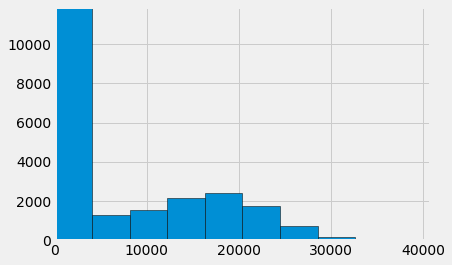

In [71]:
df['Megawatthours'].hist(grid=True,edgecolor="k").autoscale(enable=True,axis='both',tight=True)

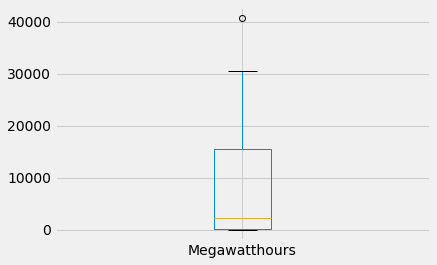

In [72]:
df['Megawatthours'].plot.box()

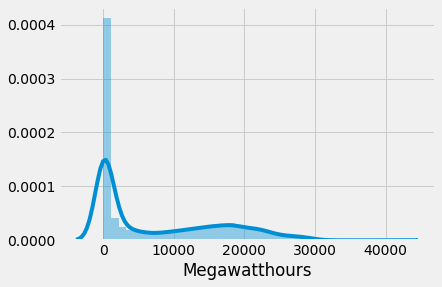

In [73]:
sns.distplot(df['Megawatthours'])

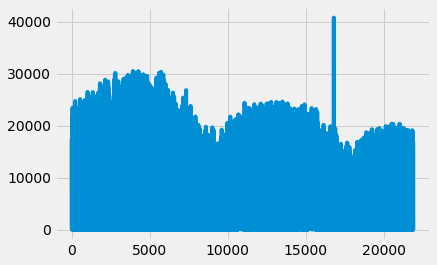

In [75]:
df['Megawatthours'].plot()

In [83]:
df.loc[::]['Megawatthours'].max()

40778

Text(0.5, 0, 'Megawatt Hours')

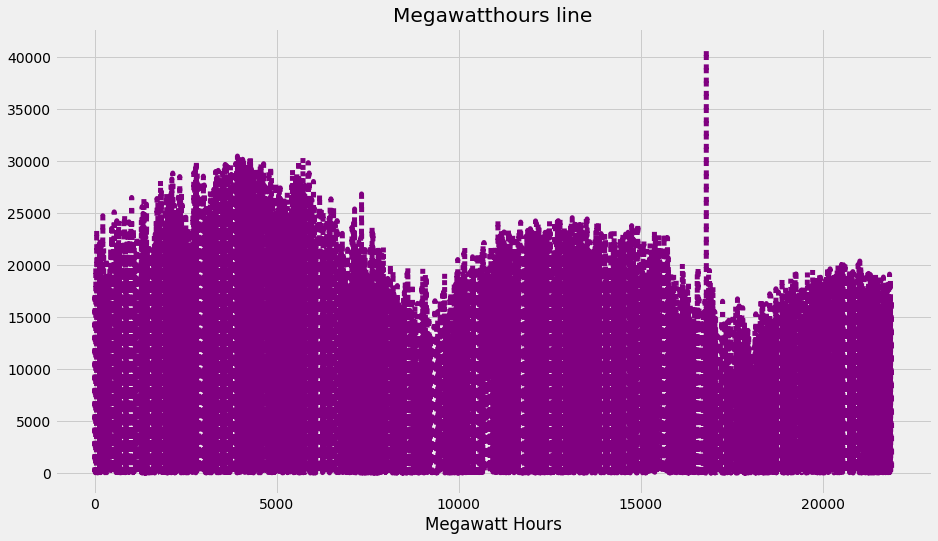

In [67]:
# ax = df["Megawatthours"].plot.line(ls="dotted", c="purple", lw=5, figsize=(14,8))

# ax.set_title("Megawatthours line")
# ax.set_xlabel("Megawatt Hours")

# Time series indexed dataframe by hour

In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [24]:
time_df = df.copy()

time_df = time_df.set_index("Timestamp")

time_df.head(10)

,Megawatthours
Timestamp,
2020-12-29 05:00:00,50
2020-12-29 04:00:00,63
2020-12-29 03:00:00,73
2020-12-29 02:00:00,76
2020-12-29 01:00:00,117
2020-12-29 00:00:00,2010
2020-12-28 23:00:00,6394
2020-12-28 22:00:00,10656
2020-12-28 21:00:00,13931


## Net generation plot

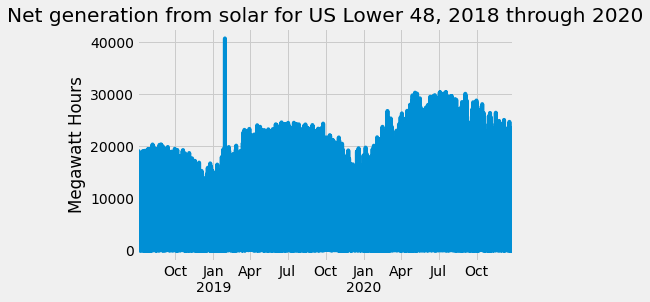

In [32]:
time_df.plot()

fig = plt.gcf()
ax = plt.gca() 

ax.set_title("Net generation from solar for US Lower 48, 2018 through 2020")
ax.set_ylabel("Megawatt Hours")
ax.set_xlabel("")
ax.get_legend().remove()
fig.savefig("Netgen20182020solar.png",bbox_inches='tight')

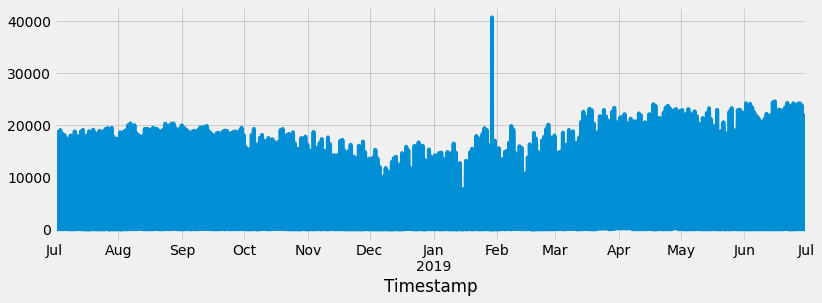

In [84]:
time_df['Megawatthours'].plot(figsize=(12,4),xlim=['2018-07-01','2019-07-01']);

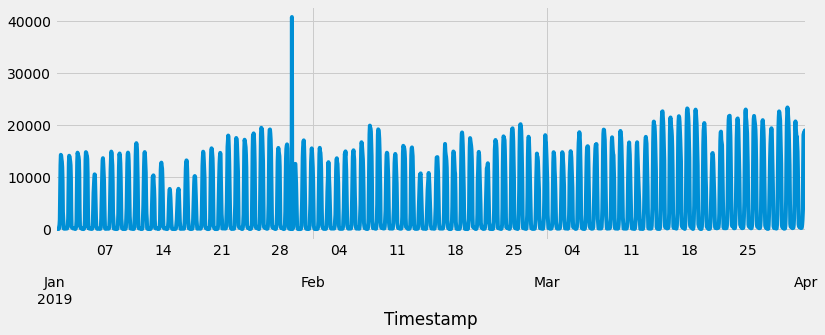

In [91]:
time_df['Megawatthours'].plot(figsize=(12,4),xlim=['2019-01-01','2019-04-01']);